### Imports

In [1]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.sparse import spdiags

### Linear squares fitting (exc. 46)

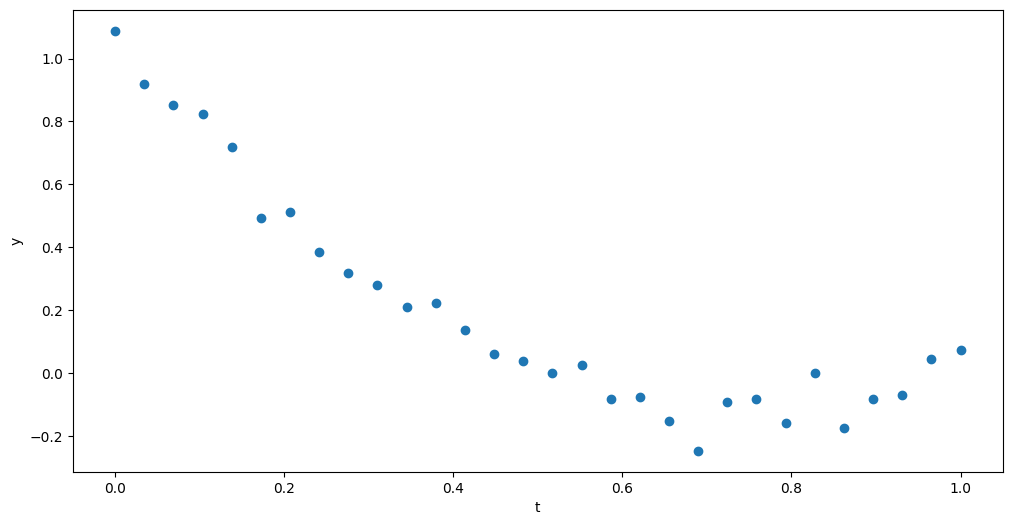

In [2]:
# set random seed
np.random.seed(0)

# 30 equidistant points between 0 and 1
t = np.linspace(0, 1, 30)
y = 2*t**2 - 3*t + 1 + 0.05*randn(len(t))

# plot data
plt.figure(figsize=(12, 6))
plt.plot(t, y, 'o')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

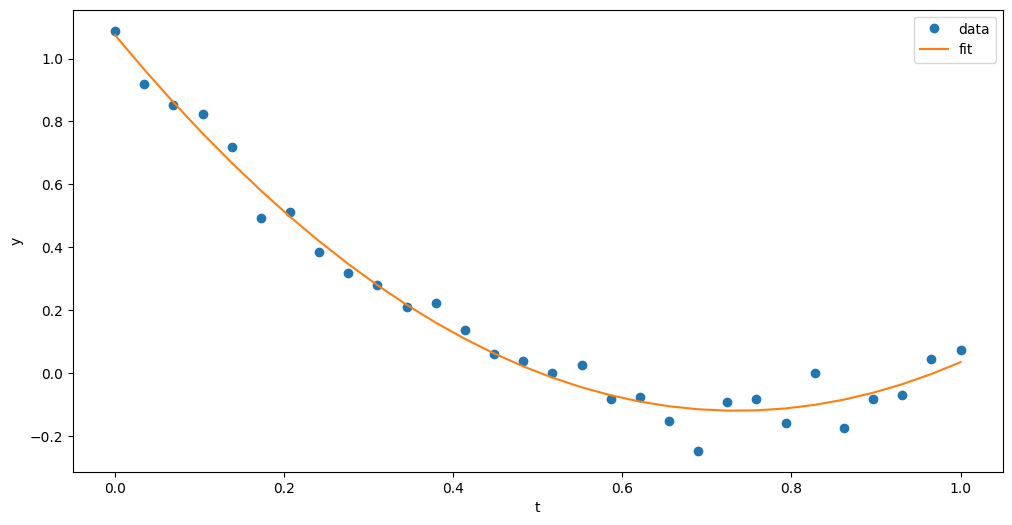

In [3]:
# define the model (matrix A, y = Ax, x = [a, b, c], A = [t**2, t, 1])
A = np.vstack([t**2, t, np.ones(len(t))]).T

# solve the linear system
x = np.linalg.lstsq(A, y, rcond=None)[0]

# plot the data and the model
plt.figure(figsize=(12, 6))
plt.plot(t, y, 'o', label='data')
plt.plot(t, np.dot(A, x), label='fit')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

### Exponential model (exc. 47)

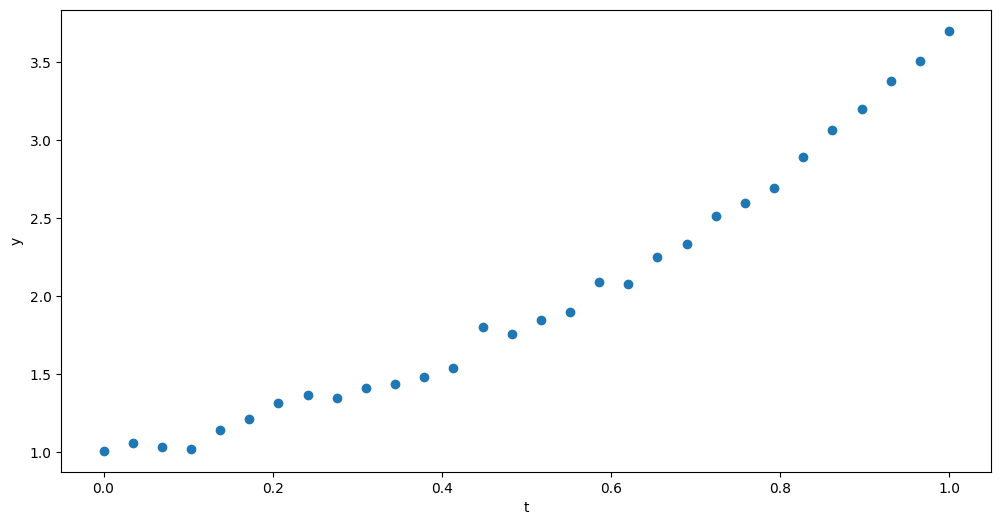

In [4]:
y = t * np.exp(t) + 1 + 0.05 * randn(len(t))

# plot data
plt.figure(figsize=(12, 6))
plt.plot(t, y, 'o')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

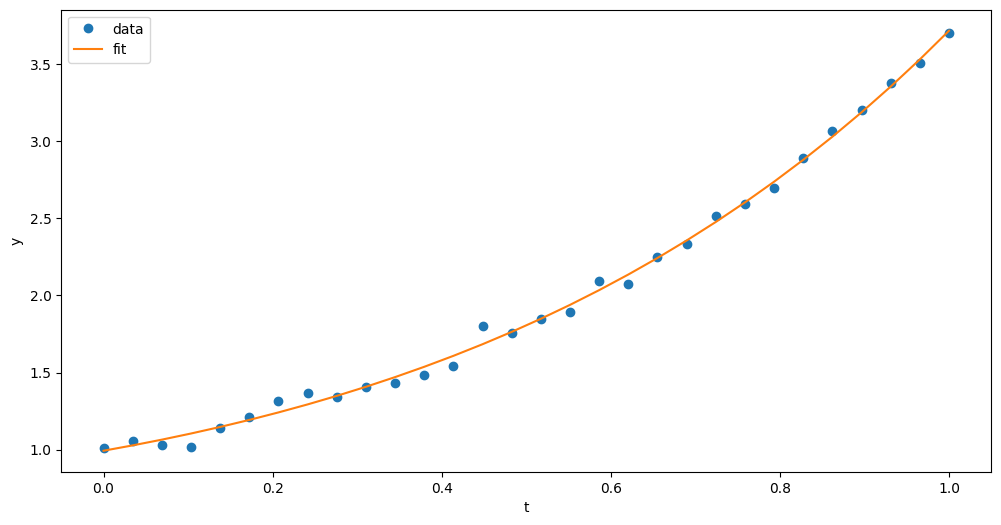

In [5]:
# define function of residuals
def fun(x, t, y):
    return x[0] * t * np.exp(x[1]*t) + x[2] - y

# initial guess
x0 = np.array([1, 1, 1])

# solve the non-linear least squares problem
res = least_squares(fun, x0, args=(t, y))

# plot the data and the model
plt.figure(figsize=(12, 6))
plt.plot(t, y, 'o', label='data')
plt.plot(t, fun(res.x, t, 0), label='fit')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

### Regularized least squares (exc. 48)

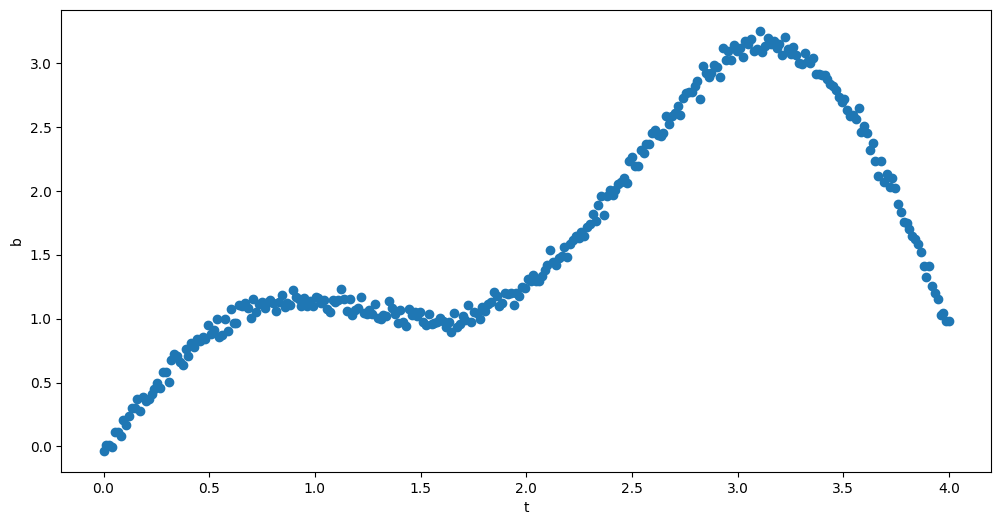

In [6]:
t = np.linspace(0, 4, 300)
b = np.sin(t) + t*(np.cos(t)**2) + 0.05*randn(len(t))

# plot data
plt.figure(figsize=(12, 6))
plt.plot(t, b, 'o')
plt.xlabel('t')
plt.ylabel('b')
plt.show()

Data model:

$b = sin(t) + t*(cos(t)^2) + \epsilon$

Where $\epsilon$ is a random variable with normal distribution $\mathcal{N}(0, 0.1)$.


Solve:

$\min _x\|x-b\|^2+\mu\|L x\|^2 \text { for } L=L_1$

First order condition:

$\frac{\partial}{\partial x}\left(\|x-b\|^2+\mu\|L x\|^2\right)=2 x-2 b+2\mu L^{\top} L x=0$

$\Rightarrow x=(I + \mu L^{\top} L)^{-1} b$

Matrix $L$ acts as a regularizer, for $L=L_1$ it penalizes the sum of absolute differences between consecutive elements of x.

$||L_1 x||^2 = \sum_{i=1}^{n-1} (x_i - x_{i+1})^2$


/tmp/ipykernel_1844/3913651997.py:36: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


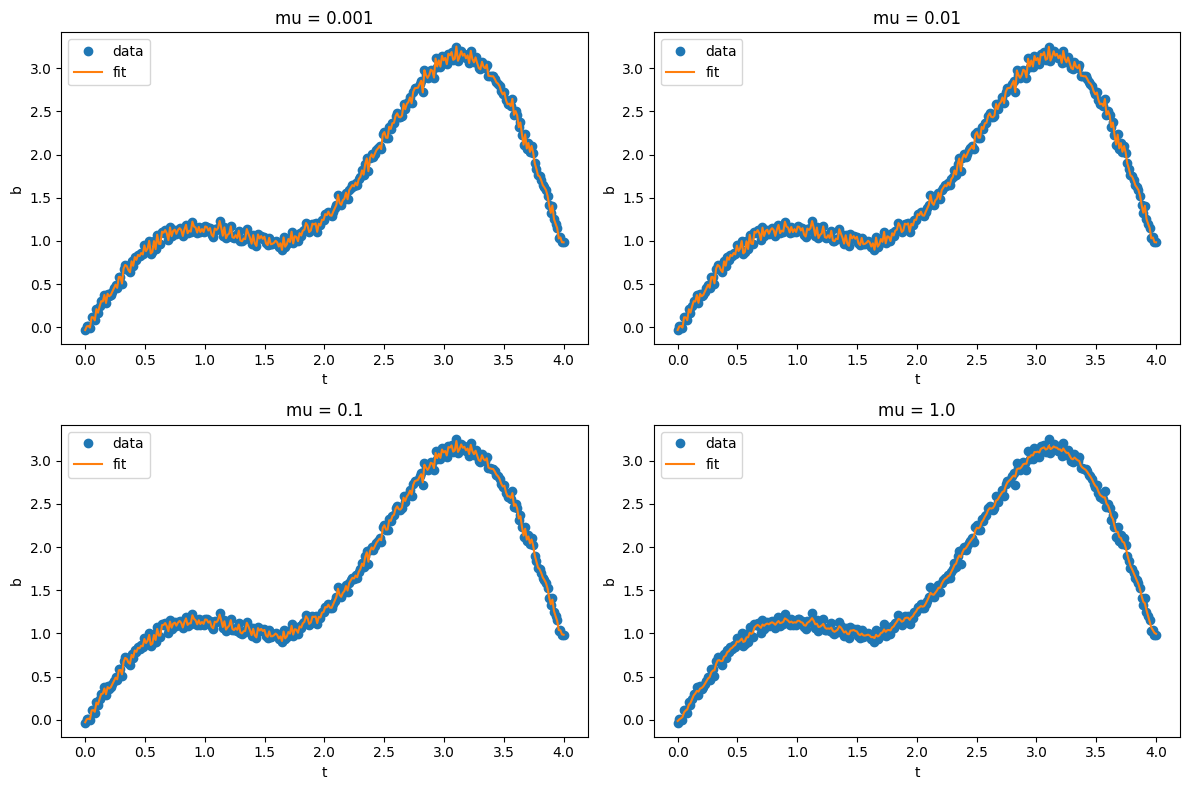

In [7]:
n = len(t)
I = np.eye(n)
e = np.ones((n))

# choose L0, L1, L2
method = 1

if method == 0:
    L = I
    mu = np.array([1e-3, 1e-2, 1e-1, 1e0])
elif method == 1:
    L = spdiags(np.vstack([e, -e]), [0, 1], n-1, n).toarray()
    mu = np.array([1e-3, 1e-2, 1e-1, 1e0])
elif method == 2:
    L = spdiags(np.vstack([e, -2*e, e]), [0, 1, 2], n-2, n).toarray()
    mu = np.array([1e-3, 1e-2, 1e-1, 1e0])

assert L.shape == (n-method, n), 'L has wrong shape'

# build L^TL
LTL = np.matmul(L.T, L)
assert LTL.shape == (n, n), 'L^TL has wrong shape'

# solve the linear system for (generalized) Tikhonov regularization
plt.figure(figsize=(12, 8))

for idx, mu in enumerate(mu):
    y = np.linalg.lstsq(I + mu*LTL, b, rcond=None)[0]
    plt.subplot(2, 2, idx+1)
    plt.plot(t, b, 'o', label='data')
    plt.plot(t, y, label='fit')
    plt.xlabel('t')
    plt.ylabel('b')
    plt.legend()
    plt.title('mu = {}'.format(mu))
    plt.tight_layout()

plt.show()